In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys, os
import extract as e
import structure as s
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

In [14]:
from plotting import plots

In [9]:
import dfconvert as dfC
from dfconvert import df_store

In [10]:
df = df_store('data').load_df()
print(df.head())


Loading pickle: data\data...
dataframe loaded successfully
                 date      d1      d2      d3      d4    v  Year  Month  Week  \
0 2002-03-03 19:04:00  0.6100  0.6100  0.6099  0.6100  0.0  2002      3     9   
1 2002-03-03 19:05:00  0.6100  0.6100  0.6099  0.6099  0.0  2002      3     9   
2 2002-03-03 19:06:00  0.6099  0.6099  0.6099  0.6099  0.0  2002      3     9   
3 2002-03-03 19:07:00  0.6099  0.6100  0.6099  0.6100  0.0  2002      3     9   
4 2002-03-03 19:08:00  0.6099  0.6101  0.6099  0.6101  0.0  2002      3     9   

   Day  ...  Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
0    3  ...         False           False           False             False   
1    3  ...         False           False           False             False   
2    3  ...         False           False           False             False   
3    3  ...         False           False           False             False   
4    3  ...         False           False           False  

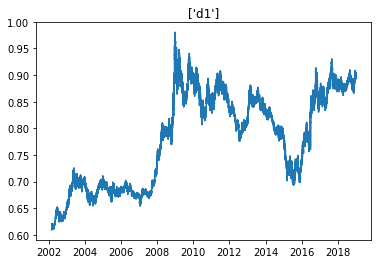

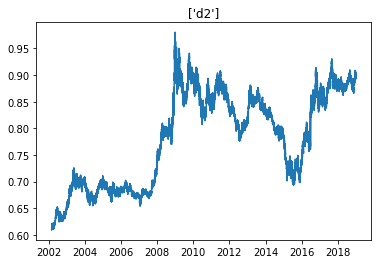

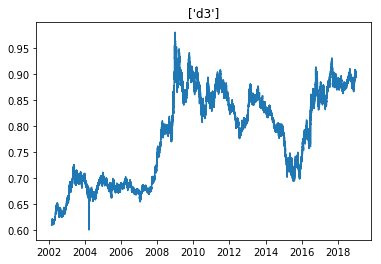

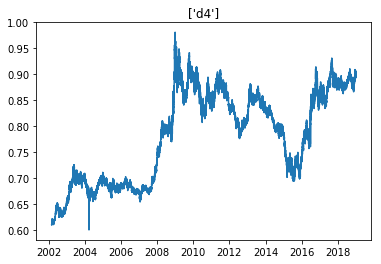

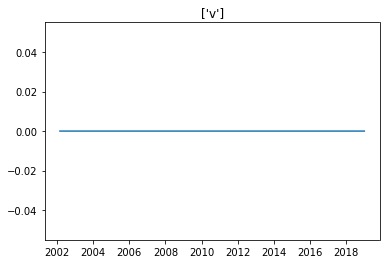

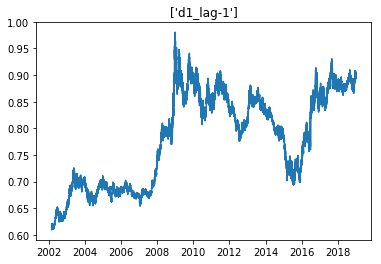

In [15]:
plots(df, None)

In [19]:
df.mean(numeric_only=True, axis=0)

KeyboardInterrupt: 

In [26]:
subset = df[:500]
subset.head()

,date,d1,d2,d3,d4,v,Year,Month,Week,Day,...,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1
0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,1,0,3,0.6100
1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099
4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,False,0,0,3,0.6099


In [27]:
subset['mean'] = subset.mean(numeric_only=True, axis=1)

C:\Users\luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
subset

,date,d1,d2,d3,d4,v,Year,Month,Week,Day,...,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,daysinmonth,aggdays,d1_lag-1,mean
0,2002-03-03 19:04:00,0.6100,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,1,0,3,0.6100,99.621424
1,2002-03-03 19:05:00,0.6100,0.6100,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573795
2,2002-03-03 19:06:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573786
3,2002-03-03 19:07:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573795
4,2002-03-03 19:08:00,0.6099,0.6101,0.6099,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573805
5,2002-03-03 19:09:00,0.6099,0.6100,0.6099,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6101,99.573805
6,2002-03-03 19:10:00,0.6101,0.6101,0.6100,0.6101,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6101,99.573829
7,2002-03-03 19:11:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6101,99.573824
8,2002-03-03 19:12:00,0.6101,0.6101,0.6100,0.6100,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573814
9,2002-03-03 19:13:00,0.6099,0.6099,0.6099,0.6099,0.0,2002,3,9,3,...,False,False,False,False,False,0,0,3,0.6099,99.573786
